In [0]:
csv = "https://raw.githubusercontent.com/andybbruno/DataMining/master/kids_train_cleaned.csv?token=AI2AUE57WCSSJEDHVD3Y6SC6AXC7Q"

In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

In [0]:
df = pd.read_csv(csv)
df.drop(df.columns[0], axis=1, inplace=True)

In [0]:
df_clus = df[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_clus = df_clus[0:20000]

In [0]:
param = [(32, 0.17), (64, 0.22), (128, 0.29), (256, 0.38), (512, 0.48)]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clus.values)

In [0]:
res = []

for p in param:
  res.append({
    'res': DBSCAN(eps=p[1], min_samples=p[0]).fit(scaled_df), 
    'ms': p[0],
    'eps': p[1]
  })

**Knee Method**

In [0]:
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

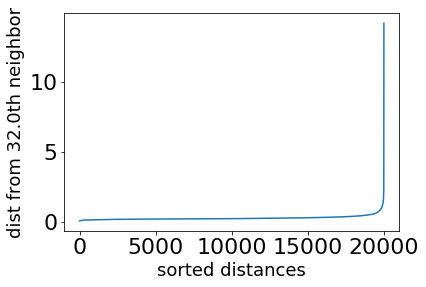

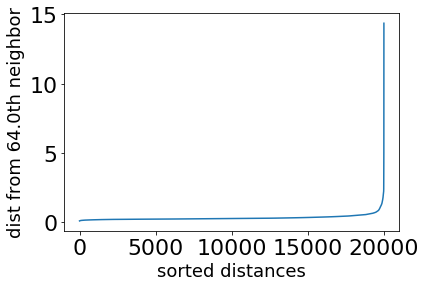

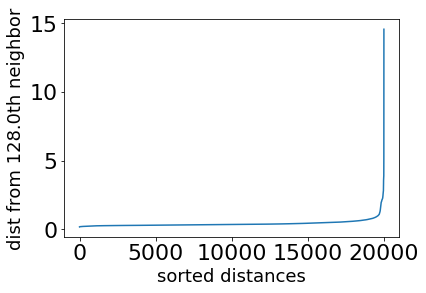

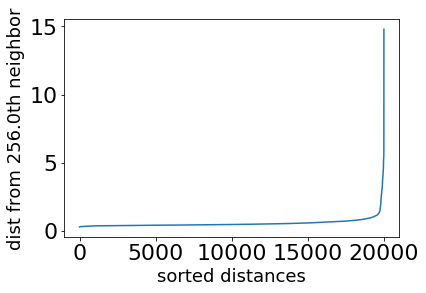

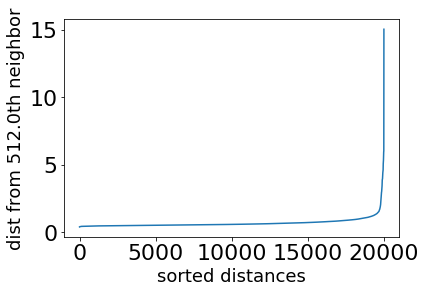

In [9]:
# SQUAREFORM
dist = squareform(pdist(scaled_df, 'euclidean')) # pair wise distance

for i in range(5, 10):
  k = math.pow(2, i)
  kth_distances = []
  for d in dist:
    index_kth_distance = np.argsort(d)[int(k)]
    kth_distances.append(d[index_kth_distance]) 
  plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
  plt.xlabel('sorted distances', fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=22)
  plt.show()

In [10]:
silu = []

for r in res:
  silu.append(silhouette_score(scaled_df, r['res'].labels_))

print(silu)

[-0.4018562651785567, -0.34720770115597105, -0.22223012402187622, -0.0868260071060077, -0.007282206583185902]


In [0]:
plot_idx = 3
plot_res = res[plot_idx]['res']
columns = []
for c in df_clus.columns:
  columns.append(c)
x = columns[0]
y = columns[1]
z = columns[2]

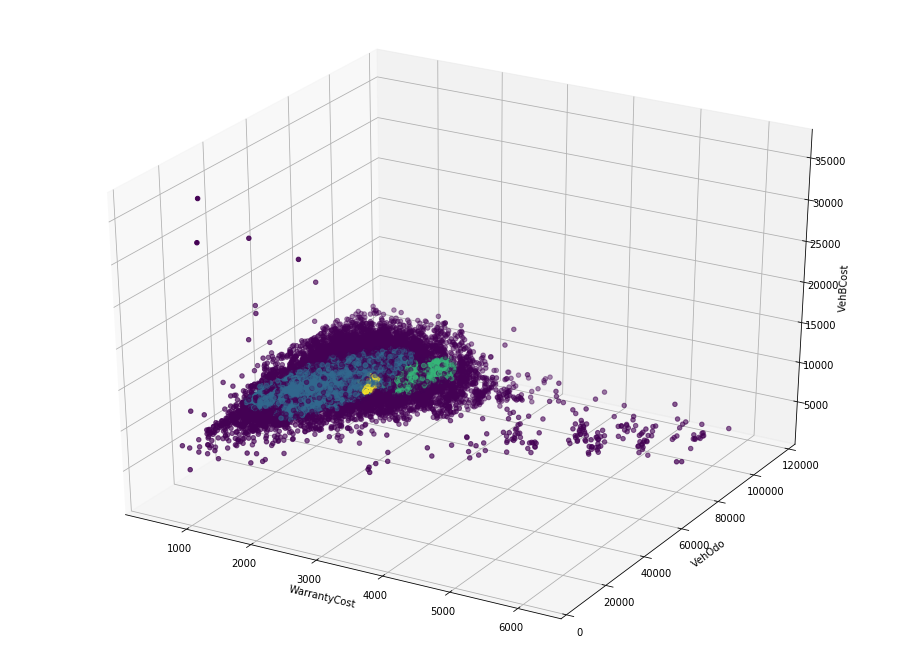

In [12]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df_clus[x],
           df_clus[y],
           df_clus[z],
           c=plot_res.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [13]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_clus[x],
    y=df_clus[y],
    z=df_clus[z],
    mode='markers',
    marker=dict(
        size=2,
        color=plot_res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

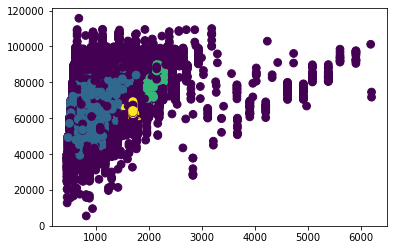

In [14]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehOdo'], 
            c=plot_res.labels_, s=60)